# EDA do dataset do coletor automático de SAO PAULO - MIRANTE - SP (A701)

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Banco de dados/dados_A701_H_2010-10-10_2025-05-25.csv", skiprows=10, sep=";")

In [3]:
# Converte para datetime
df['Data'] = pd.to_datetime(
    df['Data Medicao'] + ' ' + df['Hora Medicao'].astype(str).str.zfill(4),
    format='%Y-%m-%d %H%M'
)
df = df.drop(['Data Medicao', 'Hora Medicao'], axis=1)

In [4]:
df = df.set_index('Data', drop=True)
df.head(1)

,"PRECIPITACAO TOTAL, HORARIO(mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)","PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB),RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA DO PONTO DE ORVALHO(°C),TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C),UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),UMIDADE REL. MIN. NA HORA ANT. (AUT)(%),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, DIRECAO HORARIA (gr)(° (gr))","VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
Data,,,,,,,,,,,,,,,,,,
2010-10-10,0.0,932.4,1024.1,932.5,932.2,-2.5,13.6,11.5,14.0,13.6,11.5,11.1,87.0,83.0,87.0,170.0,7.2,3.2


Variável target (Preciptação)

In [5]:
target = df.columns[0]
target

'PRECIPITACAO TOTAL, HORARIO(mm)'

### Formato do dataset com e sem NAs

In [6]:
n_total = df.shape[0]
n_total_limpo = df.dropna().shape[0]
n_dif = n_total - n_total_limpo
print(f"Total de entradas: {n_total}\n"\
      f"Total de entradas com algum valor ausente: {n_dif}\n"
      f"Total de dados com algum valor ausente: {100*n_dif/n_total:.2f}%")

Total de entradas: 128208
Total de entradas com algum valor ausente: 2616
Total de dados com algum valor ausente: 2.04%


Retirada dos valores ausentes

In [7]:
df = df.dropna()

Colunas

In [8]:
df.shape

(125592, 18)

In [9]:
df.columns

Index(['PRECIPITACAO TOTAL, HORARIO(mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)',
       'PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)',
       'PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB)',
       'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB)',
       'RADIACAO GLOBAL(Kj/m²)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)',
       'TEMPERATURA DO PONTO DE ORVALHO(°C)',
       'TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT)(%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT)(%)',
       'UMIDADE RELATIVA DO AR, HORARIA(%)',
       'VENTO, DIRECAO HORARIA (gr)(° (gr))', 'VENTO, RAJADA MAXIMA(m/s)',
       'VENTO, VELOCIDADE HORARIA(m/s)'],
      dtype='object')

## Plotagem

### EDA

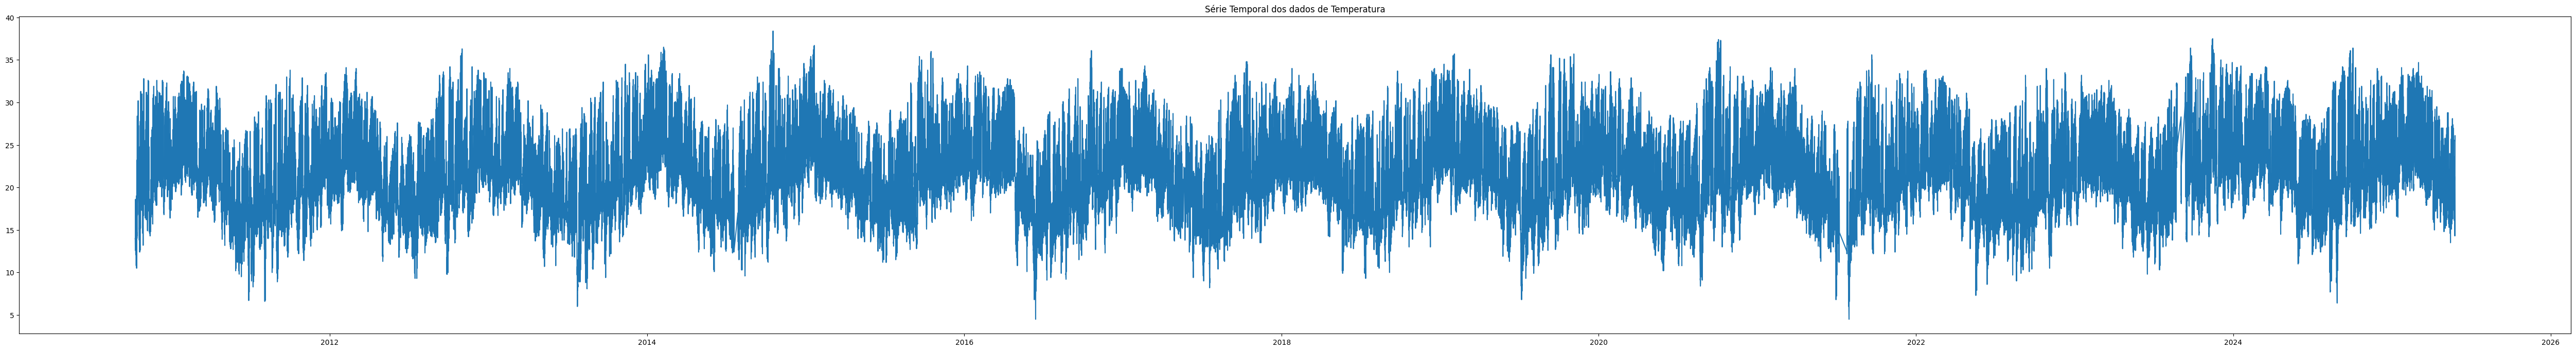

In [10]:
plt.figure(figsize=(64, 8))
plt.plot(df["TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)"])
plt.title('Série Temporal dos dados de Temperatura')
plt.show()

Dispersão do período de chuva

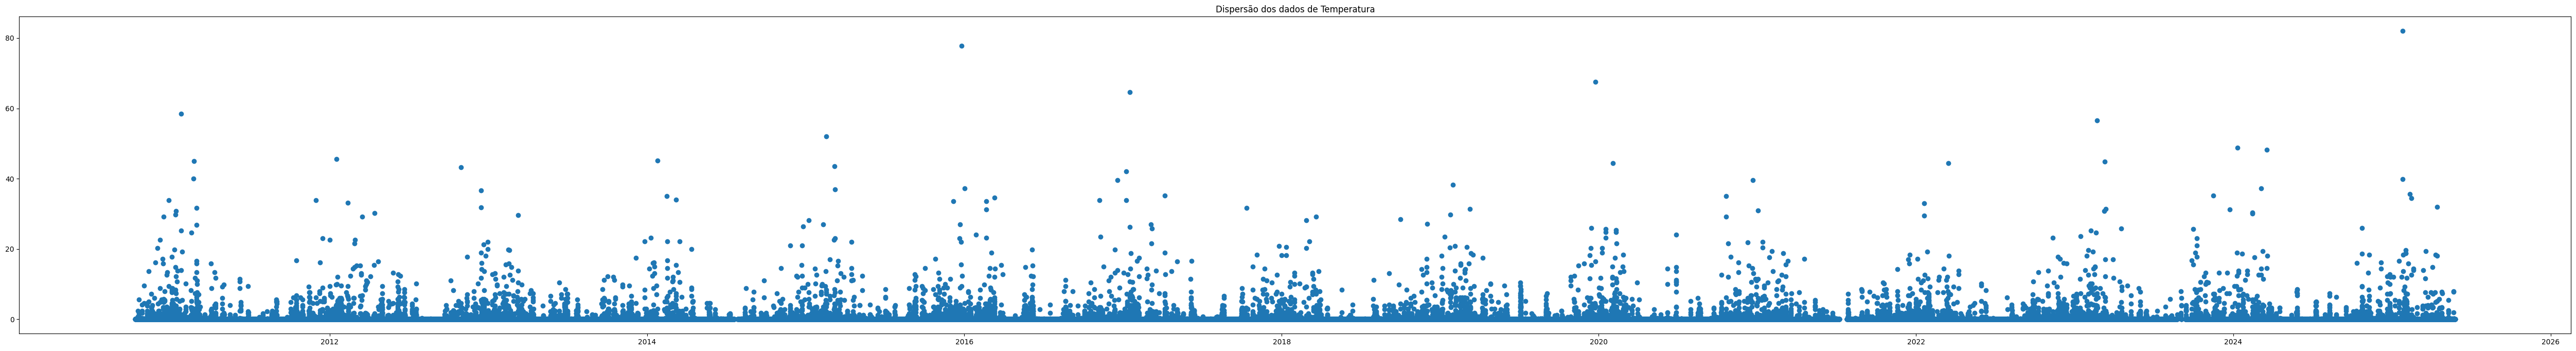

In [11]:
plt.figure(figsize=(64, 8))
plt.scatter(df.index,df["PRECIPITACAO TOTAL, HORARIO(mm)"])
plt.title('Dispersão dos dados de Temperatura')
plt.show()

Ambos apresentam um leve aspecto de sazonalidade

### Correlação

In [12]:
matrix_correl = df.corr()

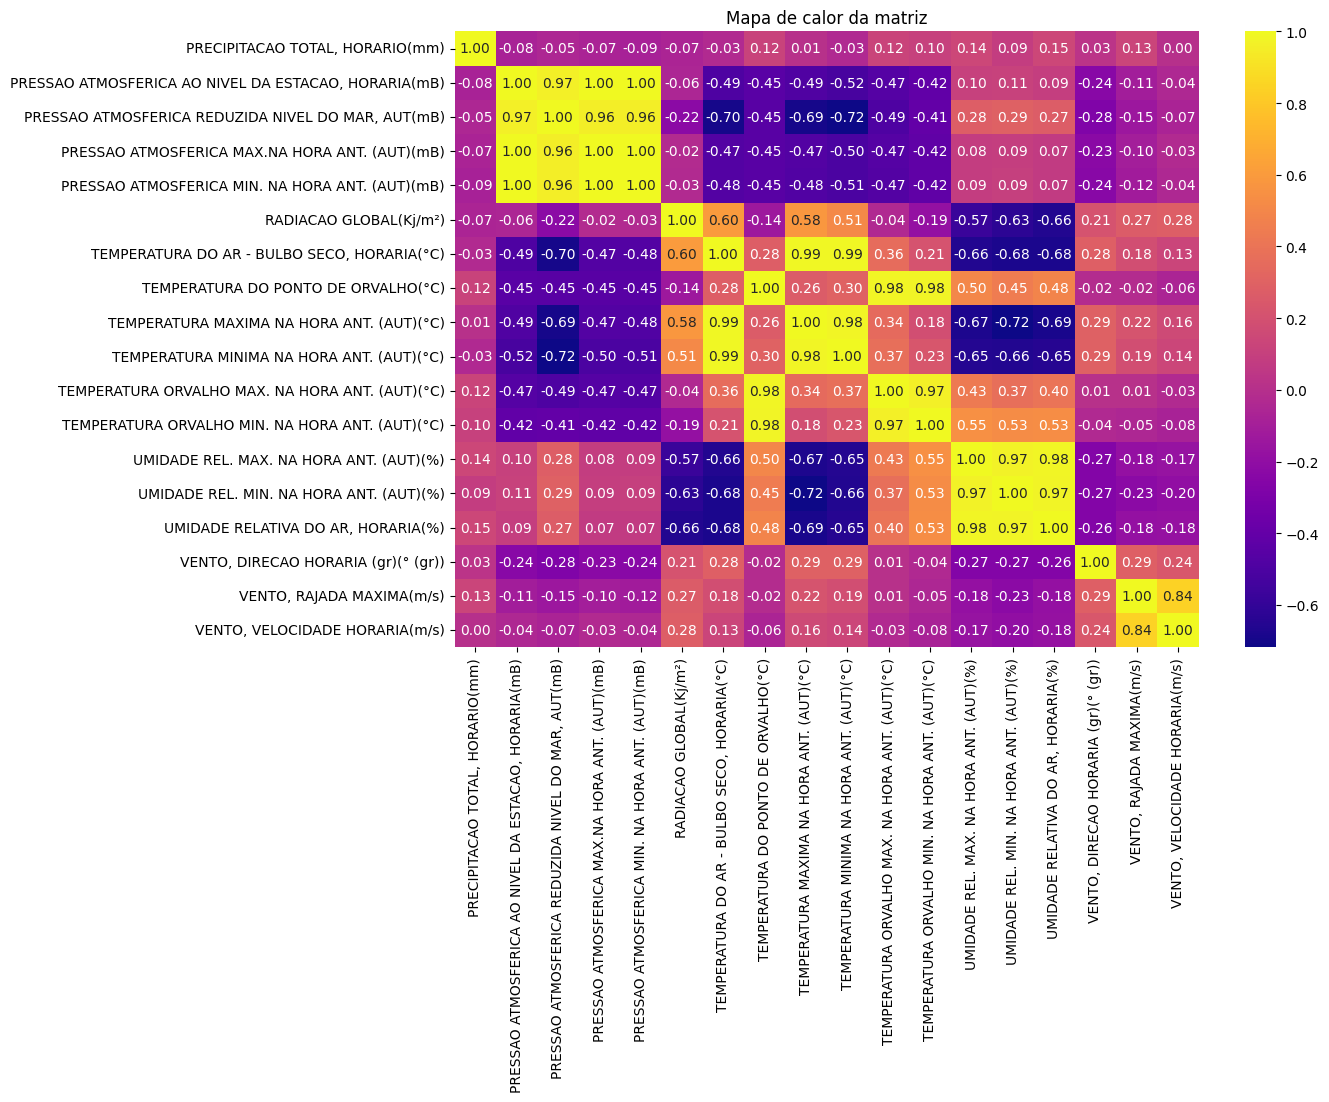

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_correl, annot=True, cmap='plasma', fmt=".2f")
plt.title('Mapa de calor da matriz')
plt.show()

## Seleção dos mais relevantes

In [14]:
df_final = df
for linha in matrix_correl["PRECIPITACAO TOTAL, HORARIO(mm)"].index:
    if abs(matrix_correl["PRECIPITACAO TOTAL, HORARIO(mm)"].loc[linha]) < 0.1:
        df_final = df_final.drop(linha, axis=1)

In [15]:
df_final.head(2)

,"PRECIPITACAO TOTAL, HORARIO(mm)",TEMPERATURA DO PONTO DE ORVALHO(°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C),UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, RAJADA MAXIMA(m/s)"
Data,,,,,,,
2010-10-10 00:00:00,0.0,11.5,11.5,11.1,87.0,87.0,7.2
2010-10-10 01:00:00,0.0,11.4,11.6,11.3,87.0,84.0,6.2


In [16]:
df_final.shape

(125592, 7)

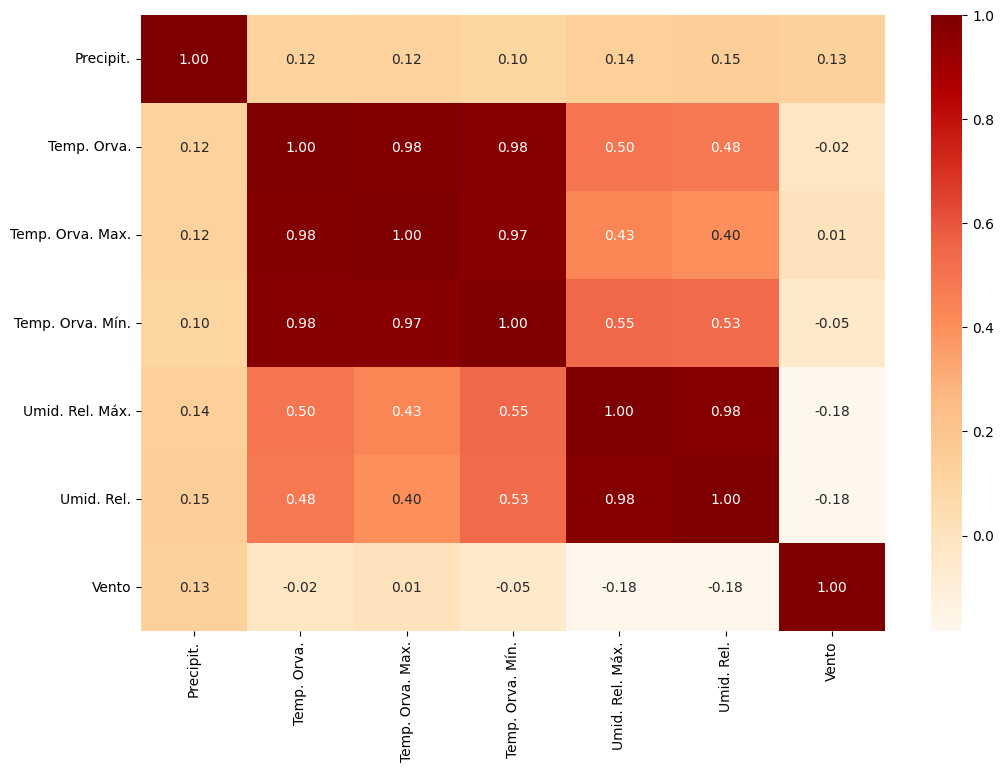

In [17]:
matrix_correl = df_final.corr()
a_g_list = ["Precipit.","Temp. Orva.","Temp. Orva. Max.","Temp. Orva. Mín.","Umid. Rel. Máx.","Umid. Rel.","Vento"]
matrix_correl.columns = [i for i in a_g_list]
matrix_correl.index = [i for i in a_g_list]
plt.figure(figsize=(12, 8))
ax = sns.heatmap(matrix_correl, annot=True, cmap='OrRd', fmt=".2f")
# plt.title('Mapa de calor da matriz')
plt.show()

Listagem em formato Latex

In [23]:
print('\\begin{itemsize}')
for col in df_final.columns:
    print('\t\\item \\textbf{"'+col+'"};')
print('\\end{itemsize}')

\begin{itemsize}
	\item \textbf{"PRECIPITACAO TOTAL, HORARIO(mm)"};
	\item \textbf{"TEMPERATURA DO PONTO DE ORVALHO(°C)"};
	\item \textbf{"TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C)"};
	\item \textbf{"TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C)"};
	\item \textbf{"UMIDADE REL. MAX. NA HORA ANT. (AUT)(%)"};
	\item \textbf{"UMIDADE RELATIVA DO AR, HORARIA(%)"};
	\item \textbf{"VENTO, RAJADA MAXIMA(m/s)"};
\end{itemsize}


### Exportação

In [39]:
df_final.to_csv("Banco de dados/inmet_filtrado_mirante.csv")